# Behavioral result

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="white")
sns.set_context("talk")

Participants: 48
Adult: 22
Adolescent: 12
Children: 14


(array([6., 5., 8., 0., 6., 1., 2., 9., 6., 5.]),
 array([ 8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28.]),
 <BarContainer object of 10 artists>)

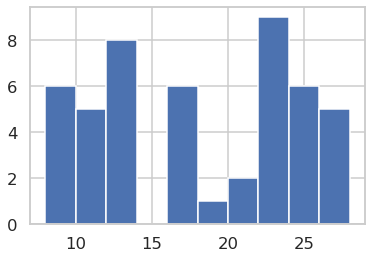

In [88]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
adult_num = len(data[data['Age']>18])
ado_num = len(data.query("18>=Age>12"))
children_num = len(data[data['Age']<=12])

print("Participants:", len(data))
print("Adult:",adult_num)
print("Adolescent:",ado_num)
print("Children:", children_num)
plt.hist(data['Age'])

## Training performance

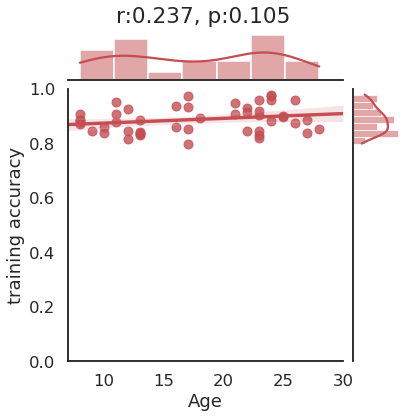

In [3]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['meg_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
#correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0, 1),
                  color="r", height=6)
#move overall title up
g.set_axis_labels('Age', 'training accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 1D Inference

48


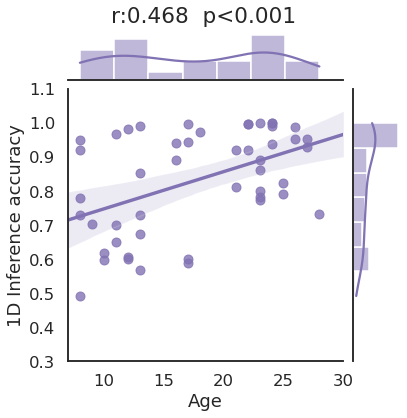

In [4]:
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['meg_behavior']==1]
print(len(data))
res = pearsonr(data['Age'],data['1D_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0.3, 1.1),
                  color="m", height=6)

#move overall title up
g.set_axis_labels('Age', '1D Inference accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 2D Inference game1

48


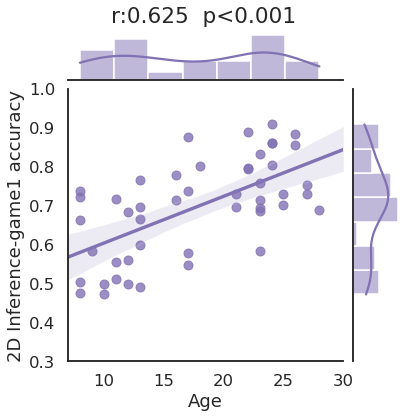

In [6]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0.3, 1),
                  color="m", height=6)

#move overall title up
g.set_axis_labels('Age', '2D Inference-game1 accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [71]:
data.query('(Age>18)and(game1_acc<0.7)')

,Participant_ID,Exp_ID,Name,Date(预约日期),Location,Age,Sex,Group,训练主试,dim 1,...,game1_acc,game2_train_ap,game2_train_dp,game2_test_acc,meg_behavior,meg_neuro,game1_behavior,game1_fmri,game2_behavior,game2_fmri
22,sub_023,Z21,王之品,2021.12.14-15,北大,23.0,female,adult,樊懿,NaN,...,0.694,0.844,0.812,0.714,1.0,1.0,1.0,1.0,1.0,1.0
26,sub_027,Z6,仝景慧,2021.12.19,生物物理所,28.0,female,adult,樊懿,NaN,...,0.690,1.000,0.906,0.774,1.0,1.0,1.0,1.0,1.0,1.0
32,sub_033,Z15,张克林,2021.12.28-29,北大,23.0,male,adult,樊懿,0.82,...,0.583,0.844,1.000,0.690,1.0,1.0,1.0,1.0,1.0,1.0
35,sub_037,Z14,马韫慧,2022.1.3,生物物理所,23.0,female,adult,樊懿,0.90,...,0.687,0.906,0.875,0.690,1.0,1.0,1.0,1.0,1.0,1.0
54,sub_056,Z48,杨宏磊,2022.2.12,生物物理所,21.0,male,adult,樊懿,0.89,...,0.698,0.906,0.875,0.619,1.0,1.0,1.0,1.0,1.0,1.0


### Partial correlation: Age - 2D Inference game1 by controling training performance

In [72]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar=['training_acc','1D_acc'])

,n,r,CI95%,p-val
pearson,48,0.529231,"[0.28, 0.71]",0.000156


# Game2

#### Subject information

Participants: 46
Adult: 22
Adolescent: 12
Children: 12


(array([4., 5., 8., 0., 6., 1., 2., 9., 6., 5.]),
 array([ 8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28.]),
 <BarContainer object of 10 artists>)

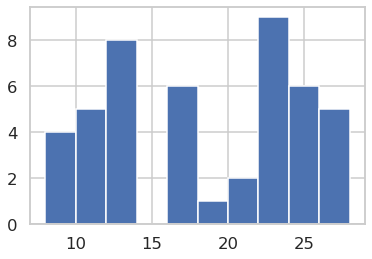

In [87]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
adult_num = len(data[data['Age']>18])
ado_num = len(data.query("18>=Age>12"))
children_num = len(data[data['Age']<=12])

print("Participants:", len(data))
print("Adult:",adult_num)
print("Adolescent:",ado_num)
print("Children:", children_num)
plt.hist(data['Age'])

### Age - game2

46


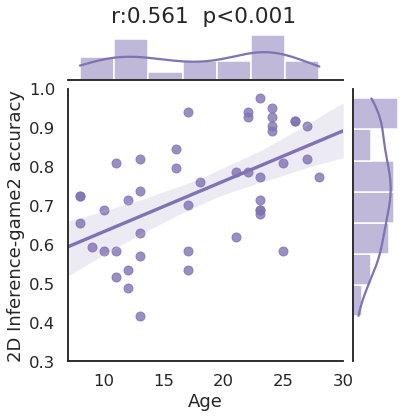

In [73]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0.3, 1),
                  color="m", height=6)
#move overall title up
g.set_axis_labels('Age', '2D Inference-game2 accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

46


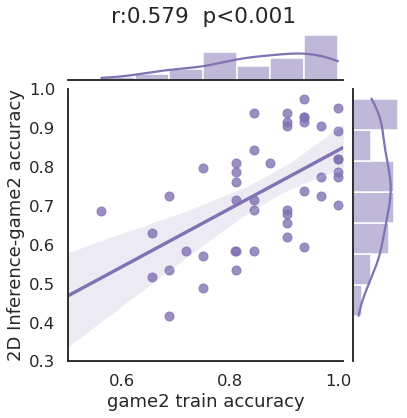

In [81]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
# cal correlation
res = pearsonr(data['game2_training_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="game2_training_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.5, 1.01), ylim=(0.3, 1),
                  color="m", height=6)
#move overall title up
g.set_axis_labels('game2 train accuracy', '2D Inference-game2 accuracy')
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/game2trian-game2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

###  Age -  correlation between game1 and game2

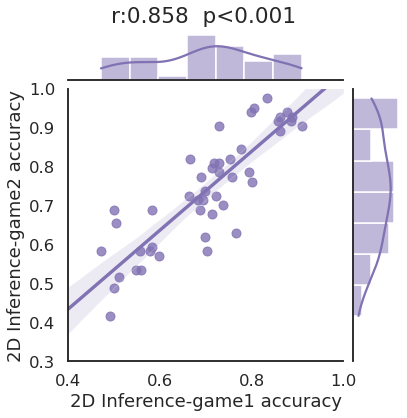

In [82]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.4, 1), ylim=(0.3, 1),
                  color="m", height=6)

res = pearsonr(data['game1_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]

#move overall title up
g.set_axis_labels('2D Inference-game1 accuracy', '2D Inference-game2 accuracy')
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)))

savepath = r'/mnt/workdir/DCM/result/behaviour/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [77]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

print(len(data))
X = data[['Age','training_acc','1D_acc']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

48
                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     86.97
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.60e-18
Time:                        09:53:01   Log-Likelihood:                 79.147
No. Observations:                  48   AIC:                            -150.3
Df Residuals:                      44   BIC:                            -142.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1104      0.138     -0.802

## game2 GLM

In [78]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

print(len(data))
X = data[['Age','training_acc','game1_acc','game2_training_acc']]
Y = data['game2_test_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

46
                            OLS Regression Results                            
Dep. Variable:         game2_test_acc   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     30.62
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           7.92e-12
Time:                        09:53:07   Log-Likelihood:                 56.158
No. Observations:                  46   AIC:                            -102.3
Df Residuals:                      41   BIC:                            -93.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1424    